In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
# -*- coding: utf-8 -*-      
from JuRunPlatform import StrategyPlatform
import matplotlib.pyplot as plt
import pandas as pd
# 平台初始化（必须）
sp = StrategyPlatform()
# 设置要回测的品种（必须）
#sp.SetStockList("000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ".split(','))
#sp.SetStockList(['000001.SZ', '000002.SZ', '603997.SH', '603998.SH', '603999.SH'])
# 或者
sp.SetStockListByCSVFile('ashare.csv')
# 要操作的日期（必须）
sp.SetDate(20100104, 20190929)
#sp.SetTradingCost(0)
# 策略begin
close = sp.LoadData('ashare',"S_DQ_ADJCLOSE")

start loading S_DQ_ADJCLOSE, db_type is:h5, pleae wait ...


In [3]:
np.shape(close)

(2370, 3796)

In [4]:
#数据预处理
#去极值
def Winsorize_median(tmp):
    df=pd.DataFrame()
    for i in range(len(tmp)):
        mad=(tmp.iloc[i,:]-tmp.iloc[i,:].median()).abs().median()
        max_range=tmp.iloc[i,:].median()+5*mad
        min_range=tmp.iloc[i,:].median()-5*mad
        t=np.clip(tmp.iloc[i,:],min_range,max_range)
        df=df.append(t)
    return (df)
        

##标准化
def Normalize(tmp):
    for i in range(len(tmp)):
        mu=tmp.iloc[i,:].mean()
        sigma=tmp.iloc[i,:].std()
        tmp.iloc[i,:]=(tmp.iloc[i,:]-mu)/sigma
    return tmp

In [5]:
#获取交易日序列
dates= sp.btp.date_num_list_trading
datestr=[]
#日期序列转化日期格式
for da in dates:
    time_format = datetime.datetime.strptime(str(int(da)), '%Y%m%d')
    datestr.append(time_format)

In [6]:
df1=pd.DataFrame(close,index=[datestr])
df1.head(7)

,0,1,2,3,4,5,6,7,8,9,...,3786,3787,3788,3789,3790,3791,3792,3793,3794,3795
2010-01-04,55.51,110.89,25931.31055,4088.32007,9843.88965,35310.82812,45847.80078,44345.37109,40.64,1174.52002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,57.46,110.00,26930.58984,4129.25000,9932.16992,36672.96875,46701.23047,44244.82031,40.64,1147.93005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,56.35,107.51,26331.02930,4047.37988,9770.32031,36096.67969,47649.48047,44244.82031,40.64,1147.93005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,54.03,106.63,25631.52930,3883.64990,9608.45996,35415.60938,46606.39844,43038.14062,40.64,1139.06995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,54.59,108.40,26680.76953,4057.62012,9696.74023,35729.94922,46653.82031,43339.80859,40.64,1146.81995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,53.94,111.25,27480.19922,4032.03003,10005.74023,35834.73047,47317.58984,43138.69922,40.64,1127.98999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-12,56.81,113.73,27580.13086,4062.72998,10138.16992,36358.62891,47317.58984,44043.69922,40.64,1140.17004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#五天动量
dfm5=df1/df1.shift(5)-1

In [8]:
#去极值
dfm5_W=Winsorize_median(dfm5)


/opt/anaconda3/envs/ipykernel_py3_6_8/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [9]:
#标准化
dfm5_N=Normalize(dfm5_W)

In [10]:
#排序
alpha20per=sp.LoadZeroAlpha()

In [11]:
per20=dfm5_N.iloc[7,:].quantile(0.2) 

In [12]:
dfm5_N.iloc[7,:].values[:100]

array([-0.2202986 ,  0.97551063,  1.34901127, -0.07127615,  0.21988179,
       -0.53725169, -0.90954774, -0.48458967, -0.09534927, -0.68317749,
       -1.70751925,  0.22647224,         nan, -1.23147303, -1.5854999 ,
       -0.22641765,  0.10705707,  0.0649817 , -0.1342901 , -0.00797719,
       -0.69626896, -0.4413392 , -0.09534927, -0.70409981, -0.11288352,
        0.18115539,         nan, -0.09534927, -1.25151354, -0.26722814,
               nan, -0.89800672,  2.59016125,  1.14741375,  0.32347334,
       -0.18446341, -0.39521832,  0.74385331, -0.42799881,  0.0621044 ,
       -1.00151336, -0.56181089, -0.18409419, -0.80407918, -0.55513942,
       -0.64032532,  0.02020186,  0.55808851,  1.02396426,  0.74434233,
       -1.3033732 ,  0.67136595, -0.78549625,  0.16902562,         nan,
        0.49455553,         nan,  1.30265542, -0.2949178 , -0.56305235,
        0.939827  ,         nan, -0.22392661, -0.73915623, -0.96676065,
       -0.77681613,  0.41368629, -0.15556904, -0.19943873, -1.55

In [13]:
alpha20per[0,:][dfm5_N.iloc[7,:]>0.2]=1

In [14]:
alpha20per[0,:][:100]

array([0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0.])

In [15]:
dfm5_N.iloc[7,:][:200]

0     -0.220299
1      0.975511
2      1.349011
3     -0.071276
4      0.219882
5     -0.537252
6     -0.909548
7     -0.484590
8     -0.095349
9     -0.683177
10    -1.707519
11     0.226472
12          NaN
13    -1.231473
14    -1.585500
15    -0.226418
16     0.107057
17     0.064982
18    -0.134290
19    -0.007977
20    -0.696269
21    -0.441339
22    -0.095349
23    -0.704100
24    -0.112884
25     0.181155
26          NaN
27    -0.095349
28    -1.251514
29    -0.267228
30          NaN
31    -0.898007
32     2.590161
33     1.147414
34     0.323473
35    -0.184463
36    -0.395218
37     0.743853
38    -0.427999
39     0.062104
40    -1.001513
41    -0.561811
42    -0.184094
43    -0.804079
44    -0.555139
45    -0.640325
46     0.020202
47     0.558089
48     1.023964
49     0.744342
50    -1.303373
51     0.671366
52    -0.785496
53     0.169026
54          NaN
55     0.494556
56          NaN
57     1.302655
58    -0.294918
59    -0.563052
60     0.939827
61          NaN
62    -0

In [16]:
for i in range(1,len(alpha20per)):
    alpha20per[i,:][dfm5_N.iloc[i-1,:]>dfm5_N.iloc[i-1,:].quantile(0.2)]=1

In [17]:
alpha20per

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

start generating performance ...
start loading S_DQ_ADJCLOSE, db_type is:h5, pleae wait ...
start loading S_DQ_ADJCLOSE, db_type is:h5, pleae wait ...
start loading S_DQ_PCTCHANGE, db_type is:h5, pleae wait ...
start loading S_DQ_HIGH, db_type is:h5, pleae wait ...
start loading S_DQ_LOW, db_type is:h5, pleae wait ...
start loading S_DQ_TRADESTATUS_SIG, db_type is:h5, pleae wait ...
proceeding ...
performance saving ...
proceeding ...


/data/home/BTP_Wasabi/PlatformFolder/BackTestingPlatform.py:283: RuntimeWarning: invalid value encountered in true_divide
  percWeight = (alpha / np.sum(np.abs(alpha), axis=1).reshape(-1, 1)) * bookList.reshape(-1, 1)
/data/home/BTP_Wasabi/PlatformFolder/BackTestingPlatform.py:654: RuntimeWarning: invalid value encountered in greater
  buyvalid[i, np.logical_and(high[i] == low[i], cps[i] > cps[i - 1])] = 0
/data/home/BTP_Wasabi/PlatformFolder/BackTestingPlatform.py:655: RuntimeWarning: invalid value encountered in less
  sellvalid[i, np.logical_and(high[i] == low[i], cps[i] < cps[i - 1])] = 0
/data/home/BTP_Wasabi/PlatformFolder/BackTestingPlatform.py:755: RuntimeWarning: invalid value encountered in true_divide
  stockBuyiedDT = self.finalVolWeight / self.finalVolWeight
/data/home/BTP_Wasabi/PlatformFolder/BackTestingPlatform.py:757: RuntimeWarning: invalid value encountered in true_divide
  stockInPoolDT = self.finalVolWeight / np.abs(self.finalVolWeight)
/data/home/BTP_Wasabi/Platfo


                        Sharpe       Return  MaxDrawdown     Turnover
20100105-20101231       -0.104        -2.57       -31.81         21.8
20110104-20111230       -1.425       -30.82       -40.12         19.4
20120104-20121231        0.072         1.68       -40.30         19.2
20130104-20131231        0.573        11.74       -22.23         20.4
20140102-20141231        1.964        34.17       -12.14         20.4
20150105-20151231        1.702        68.34       -25.79         21.3
20160104-20161230       -0.262        -7.33       -17.44         19.9
20170103-20171229       -1.353       -18.94       -12.80         18.7
20180102-20181228       -1.588       -33.98       -27.79         18.3
20190102-20190927        1.065        24.73       -13.50         18.7

20100105-20190927        0.172         4.20       -53.89         19.8


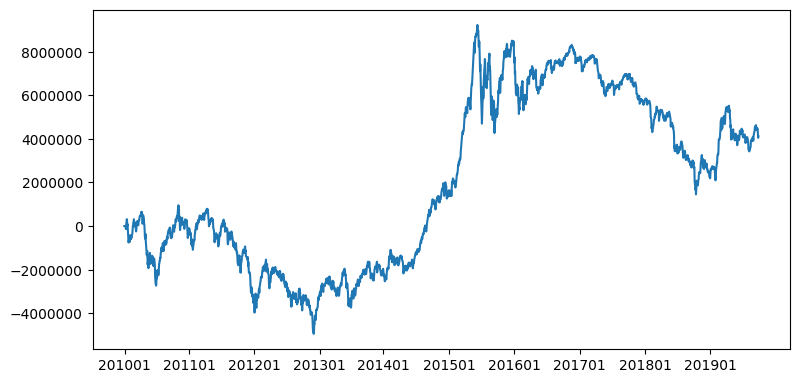

In [18]:
sp.GeneratePerformance('ashare',alpha20per, savePerformance=True)

In [19]:
alpha20per=sp.LoadZeroAlpha()
alpha40per=sp.LoadZeroAlpha()
alpha60per=sp.LoadZeroAlpha()
alpha80per=sp.LoadZeroAlpha()
alpha100per=sp.LoadZeroAlpha()

In [20]:
for i in range(1,len(alpha20per)):
    alpha20per[i,:][dfm5_N.iloc[i-1,:]<dfm5_N.iloc[i-1,:].quantile(0.2)]=1
for i in range(1,len(alpha40per)):
    alpha40per[i,:][(dfm5_N.iloc[i-1,:]>dfm5_N.iloc[i-1,:].quantile(0.2))&(dfm5_N.iloc[i-1,:]<dfm5_N.iloc[i-1,:].quantile(0.4))]=1
for i in range(1,len(alpha60per)):
    alpha60per[i,:][(dfm5_N.iloc[i-1,:]>dfm5_N.iloc[i-1,:].quantile(0.4))&(dfm5_N.iloc[i-1,:]<dfm5_N.iloc[i-1,:].quantile(0.6))]=1
for i in range(1,len(alpha20per)):
    alpha80per[i,:][(dfm5_N.iloc[i-1,:]>dfm5_N.iloc[i-1,:].quantile(0.6))&(dfm5_N.iloc[i-1,:]<dfm5_N.iloc[i-1,:].quantile(0.8))]=1
for i in range(1,len(alpha20per)):
    alpha100per[i,:][dfm5_N.iloc[i-1,:]>dfm5_N.iloc[i-1,:].quantile(0.8)]=1

start generating performance ...
start loading S_DQ_ADJCLOSE, db_type is:h5, pleae wait ...
start loading S_DQ_ADJCLOSE, db_type is:h5, pleae wait ...
start loading S_DQ_PCTCHANGE, db_type is:h5, pleae wait ...
start loading S_DQ_HIGH, db_type is:h5, pleae wait ...
start loading S_DQ_LOW, db_type is:h5, pleae wait ...
start loading S_DQ_TRADESTATUS_SIG, db_type is:h5, pleae wait ...
proceeding ...
performance saving ...
proceeding ...

                        Sharpe       Return  MaxDrawdown     Turnover
20100105-20101231        0.954        26.20       -26.86         83.7
20110104-20111230       -1.009       -25.71       -32.25         78.3
20120104-20121231        0.314         8.47       -26.74         74.4
20130104-20131231        1.531        36.47       -12.54         78.0
20140102-20141231        1.837        38.75        -6.06         79.7
20150105-20151231        1.373        62.31       -25.64         83.5
20160104-20161230       -0.509       -17.84       -15.84         75.8


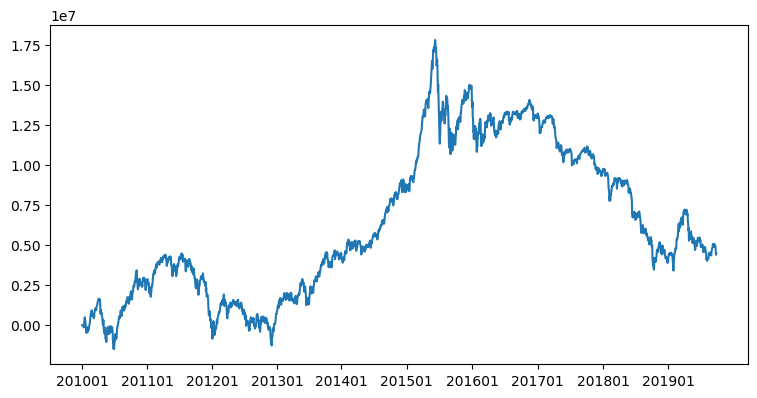

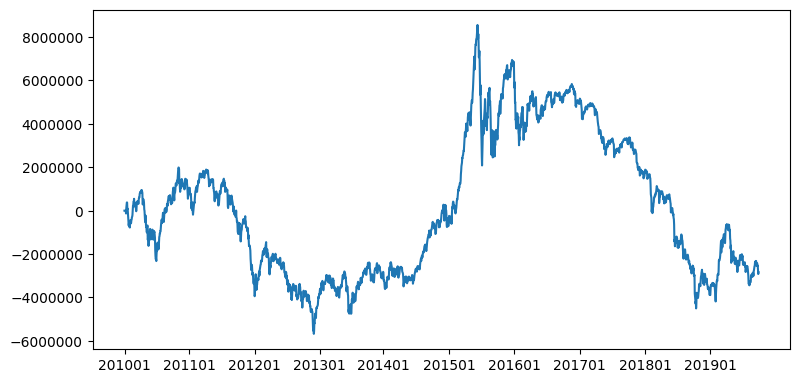

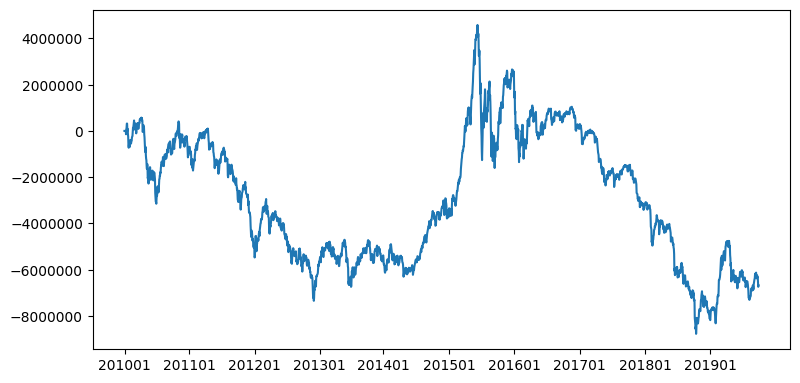

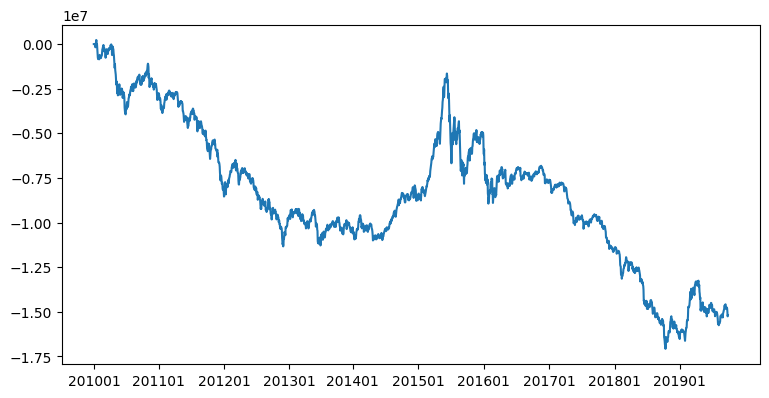

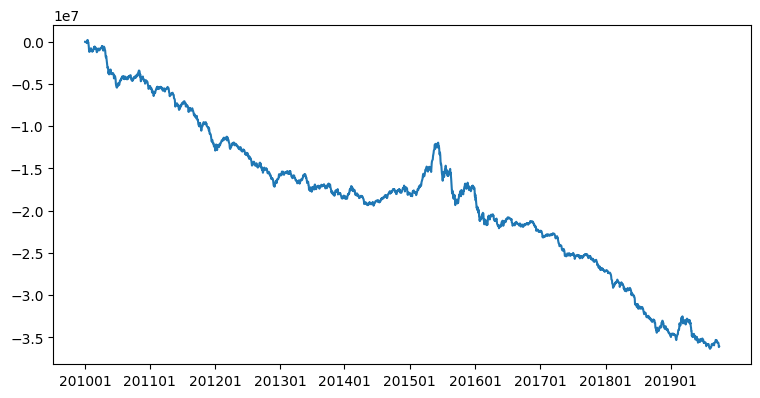

In [21]:
sp.GeneratePerformance('ashare',alpha20per,savePerformance=True,longShort=False)
sp.GeneratePerformance('ashare',alpha40per,savePerformance=True,longShort=False)
sp.GeneratePerformance('ashare',alpha60per,savePerformance=True,longShort=False)
sp.GeneratePerformance('ashare',alpha80per,savePerformance=True,longShort=False)
sp.GeneratePerformance('ashare',alpha100per,savePerformance=True,longShort=False)
